# Data Cleaning and Pre-Processing

In [1]:
#import required libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in all CSV files from FRED 
consumer_inflation = pd.read_csv('consumer_inflation.csv')
deposits_commercial_banks = pd.read_csv('deposits_commerical_banks.csv')
fed_effective_rate = pd.read_csv('fed_effective_rate.csv')
gdp = pd.read_csv('gdp.csv')
mortgage_rate = pd.read_csv('morgage_rates.csv')
personal_consumption_exp = pd.read_csv('personal_consumper_exp.csv')
population = pd.read_csv('population.csv')
poverty_rate = pd.read_csv('poverty_rate.csv')
unemployment_rate = pd.read_csv('unemployment_rate.csv')

In [3]:
#Convert Date Columns to datetime for each dataset 
consumer_inflation['observation_date'] = pd.to_datetime(consumer_inflation['observation_date'])
deposits_commercial_banks['observation_date'] = pd.to_datetime(deposits_commercial_banks['observation_date'])
fed_effective_rate['observation_date'] = pd.to_datetime(fed_effective_rate['observation_date'])
gdp['observation_date'] = pd.to_datetime(gdp['observation_date'])
mortgage_rate['observation_date'] = pd.to_datetime(mortgage_rate['observation_date'])
personal_consumption_exp['observation_date'] = pd.to_datetime(personal_consumption_exp['observation_date'])
population['observation_date'] = pd.to_datetime(population['observation_date'])
unemployment_rate['observation_date'] = pd.to_datetime(unemployment_rate['observation_date'])

In [4]:
#Extract the Year from the Date Column 
consumer_inflation['Year'] = consumer_inflation['observation_date'].dt.year
deposits_commercial_banks['Year'] = deposits_commercial_banks['observation_date'].dt.year
fed_effective_rate['Year'] = fed_effective_rate['observation_date'].dt.year
gdp['Year'] = gdp['observation_date'].dt.year
mortgage_rate['Year'] = mortgage_rate['observation_date'].dt.year
personal_consumption_exp['Year'] = personal_consumption_exp['observation_date'].dt.year
population['Year'] = population['observation_date'].dt.year
unemployment_rate['Year'] = unemployment_rate['observation_date'].dt.year

In [5]:
#Get the column name for each csv file using a dictionary 
columns_list = {
    'consumer_inflation': list(consumer_inflation.columns),
    'deposits_commercial_banks': list(deposits_commercial_banks.columns),
    'fed_effective_rate': list(fed_effective_rate.columns),
    'gdp': list(gdp.columns),
    'mortgage_rate': list(mortgage_rate.columns),
    'personal_consumption_exp': list(personal_consumption_exp.columns),
    'population': list(population.columns),
    'poverty_rate': list(poverty_rate.columns),
    'unemployment_rate': list(unemployment_rate.columns)
}
#display results 
for key, value in columns_list.items():
    print(f"Columns for {key}: {value}")

Columns for consumer_inflation: ['observation_date', 'FPCPITOTLZGUSA', 'Year']
Columns for deposits_commercial_banks: ['observation_date', 'H8B1058NCBCAG', 'Year']
Columns for fed_effective_rate: ['observation_date', 'RIFSPFFNA', 'Year']
Columns for gdp: ['observation_date', 'GDP', 'Year']
Columns for mortgage_rate: ['observation_date', 'MORTGAGE30US', 'Year']
Columns for personal_consumption_exp: ['observation_date', 'PCECA', 'Year']
Columns for population: ['observation_date', 'POPTHM', 'Year']
Columns for poverty_rate: ['observation_date', 'PPAAUS00000A156NCEN']
Columns for unemployment_rate: ['observation_date', 'UNRATE', 'Year']


In [6]:
#Use dictionary to rename columns 
consumer_inflation.rename(columns={
    'observation_date': 'Date',
    'FPCPITOTLZGUSA': 'Consumer_Inflation',
    'Year': 'Year'
}, inplace=True)

deposits_commercial_banks.rename(columns={
    'observation_date': 'Date',
    'H8B1058NCBCAG': 'Deposits_Commercial_Banks',
    'Year': 'Year'
}, inplace=True)

fed_effective_rate.rename(columns={
    'observation_date': 'Date',
    'RIFSPFFNA': 'Fed_Effective_Rate',
    'Year': 'Year'
}, inplace=True)

gdp.rename(columns={
    'observation_date': 'Date',
    'GDP': 'GDP',
    'Year': 'Year'
}, inplace=True)

mortgage_rate.rename(columns={
    'observation_date': 'Date',
    'MORTGAGE30US': 'Mortgage_Rate',
    'Year': 'Year'
}, inplace=True)

personal_consumption_exp.rename(columns={
    'observation_date': 'Date',
    'PCECA': 'Personal_Consumption_Expenditure',
    'Year': 'Year'
}, inplace=True)

population.rename(columns={
    'observation_date': 'Date',
    'POPTHM': 'Population',
    'Year': 'Year'
}, inplace=True)

poverty_rate.rename(columns={
    'observation_date': 'Date',
    'PPAAUS00000A156NCEN': 'Poverty_Rate'
}, inplace=True)

unemployment_rate.rename(columns={
    'observation_date': 'Date',
    'UNRATE': 'Unemployment_Rate',
    'Year': 'Year'
}, inplace=True)

In [7]:
#Check new column names 
updated_columns_list = {
    'consumer_inflation': list(consumer_inflation.columns),
    'deposits_commercial_banks': list(deposits_commercial_banks.columns),
    'fed_effective_rate': list(fed_effective_rate.columns),
    'gdp': list(gdp.columns),
    'mortgage_rate': list(mortgage_rate.columns),
    'personal_consumption_exp': list(personal_consumption_exp.columns),
    'population': list(population.columns),
    'poverty_rate': list(poverty_rate.columns),
    'unemployment_rate': list(unemployment_rate.columns)
}
#display results 
for key, value in updated_columns_list.items():
    print(f"Columns for {key}: {value}")

Columns for consumer_inflation: ['Date', 'Consumer_Inflation', 'Year']
Columns for deposits_commercial_banks: ['Date', 'Deposits_Commercial_Banks', 'Year']
Columns for fed_effective_rate: ['Date', 'Fed_Effective_Rate', 'Year']
Columns for gdp: ['Date', 'GDP', 'Year']
Columns for mortgage_rate: ['Date', 'Mortgage_Rate', 'Year']
Columns for personal_consumption_exp: ['Date', 'Personal_Consumption_Expenditure', 'Year']
Columns for population: ['Date', 'Population', 'Year']
Columns for poverty_rate: ['Date', 'Poverty_Rate']
Columns for unemployment_rate: ['Date', 'Unemployment_Rate', 'Year']


In [8]:
#For simplicitly, aggregate the monthy data to year data through taking the average of each year 
gdp_yearly = gdp.groupby('Year').agg({'GDP': 'mean'}).reset_index()
unemployment_rate_yearly = unemployment_rate.groupby('Year').agg({'Unemployment_Rate': 'mean'}).reset_index()
fed_effective_rate_yearly = fed_effective_rate.groupby('Year').agg({'Fed_Effective_Rate': 'mean'}).reset_index()
consumer_inflation_yearly = consumer_inflation.groupby('Year').agg({'Consumer_Inflation': 'mean'}).reset_index()
personal_consumption_exp_yearly = personal_consumption_exp.groupby('Year').agg({'Personal_Consumption_Expenditure': 'mean'}).reset_index()
population_yearly = population.groupby('Year').agg({'Population': 'mean'}).reset_index()
mortgage_rate_yearly = mortgage_rate.groupby('Year').agg({'Mortgage_Rate': 'mean'}).reset_index()
deposits_commercial_banks_yearly = deposits_commercial_banks.groupby('Year').agg({'Deposits_Commercial_Banks': 'mean'}).reset_index()

In [9]:
#Put observation_date into datetime format with the infer format for the date
poverty_rate['Date'] = pd.to_datetime(poverty_rate['Date'], errors='coerce')

#Extract the year from the 'Date' column and create a 'Year' column 
poverty_rate['Year'] = poverty_rate['Date'].dt.year

#Check the first few rows to ensure th year column is right 
print(poverty_rate.head())

        Date  Poverty_Rate  Year
0 1989-01-01          12.8  1989
1 1990-01-01           NaN  1990
2 1991-01-01           NaN  1991
3 1992-01-01           NaN  1992
4 1993-01-01          15.1  1993


In [10]:
#Merge all datasets on the year column 
merged_data = gdp_yearly.merge(unemployment_rate_yearly, on='Year', how='outer')
merged_data = merged_data.merge(fed_effective_rate_yearly, on='Year', how='outer')
merged_data = merged_data.merge(consumer_inflation_yearly, on='Year', how='outer')
merged_data = merged_data.merge(personal_consumption_exp_yearly, on='Year', how='outer')
merged_data = merged_data.merge(population_yearly, on='Year', how='outer')
merged_data = merged_data.merge(mortgage_rate_yearly, on='Year', how='outer')
merged_data = merged_data.merge(deposits_commercial_banks_yearly, on='Year', how='outer')
merged_data = merged_data.merge(poverty_rate, on='Year', how='outer')

In [11]:
#Check poverty merged correctly 
merged_data = pd.merge(merged_data, poverty_rate[['Year', 'Poverty_Rate']], on='Year', how='outer')

In [12]:
#Fill missing data values 
merged_data = merged_data.fillna(0)

In [13]:
#Drop and renmae colum names that aren't needed
merged_data.drop('Poverty_Rate_y', axis=1, inplace=True) 
merged_data.rename(columns={'Poverty_Rate_x': 'Poverty_Rate'}, inplace=True)

In [14]:
merged_data

,Year,GDP,Unemployment_Rate,Fed_Effective_Rate,Consumer_Inflation,Personal_Consumption_Expenditure,Population,Mortgage_Rate,Deposits_Commercial_Banks,Date,Poverty_Rate
0,1947,249.61550,0.000000,0.0,0.0,161.852,0.0,0.0,0.0,0,0.0
1,1948,274.46775,3.750000,0.0,0.0,174.878,0.0,0.0,0.0,0,0.0
2,1949,272.47525,6.050000,0.0,0.0,178.333,0.0,0.0,0.0,0,0.0
3,1950,299.82725,5.208333,0.0,0.0,192.044,0.0,0.0,0.0,0,0.0
4,1951,346.91325,3.283333,0.0,0.0,208.339,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
92,1942,0.00000,0.000000,0.0,0.0,89.002,0.0,0.0,0.0,0,0.0
93,1943,0.00000,0.000000,0.0,0.0,99.903,0.0,0.0,0.0,0,0.0
94,1944,0.00000,0.000000,0.0,0.0,108.648,0.0,0.0,0.0,0,0.0
95,1945,0.00000,0.000000,0.0,0.0,119.977,0.0,0.0,0.0,0,0.0


# Data Formatting and Subsetting 

In [21]:
# Get the range of years for each dataset
gdp_year_range = gdp['Year'].min(), gdp['Year'].max()
population_year_range = population['Year'].min(), population['Year'].max()
unemployment_rate_year_range = unemployment_rate['Year'].min(), unemployment_rate['Year'].max()
consumer_inflation_year_range = consumer_inflation['Year'].min(), consumer_inflation['Year'].max()
fed_effective_rate_year_range = fed_effective_rate_yearly['Year'].min(), fed_effective_rate_yearly['Year'].max()
morgage_year_range = mortgage_rate_yearly['Year'].min(), mortgage_rate_yearly['Year'].max()
deposit_year_range = deposits_commercial_banks_yearly['Year'].min(), deposits_commercial_banks_yearly['Year'].max()
poverty_year_range = poverty_rate['Year'].min(), poverty_rate['Year'].max()
print(f"GDP Year Range: {gdp_year_range}")
print(f"Population Year Range: {population_year_range}")
print(f"Unemployment Rate Year Range: {unemployment_rate_year_range}")
print(f"Consumer Inflation Year Range: {consumer_inflation_year_range}")
print(f"Fed Effective Year Range: {fed_effective_rate_year_range}")
print(f"Morgage Year Rate: {morgage_year_range}")
print(f"Deposites Commercial Banks Year Rate: {deposit_year_range}")
print(f"Poverty Year Rate: {poverty_year_range}")

GDP Year Range: (1947, 2024)
Population Year Range: (1959, 2025)
Unemployment Rate Year Range: (1948, 2025)
Consumer Inflation Year Range: (1960, 2023)
Fed Effective Year Range: (1955, 2024)
Morgage Year Rate: (1971, 2025)
Deposites Commercial Banks Year Rate: (1974, 2024)
Poverty Year Rate: (1989, 2023)


In [23]:
#Filter Data between 1989 and 2023 
data = merged_data[(merged_data['Year'] >= 1989) & (merged_data['Year'] <= 2023)]
data

,Year,GDP,Unemployment_Rate,Fed_Effective_Rate,Consumer_Inflation,Personal_Consumption_Expenditure,Population,Mortgage_Rate,Deposits_Commercial_Banks,Date,Poverty_Rate
42,1989,5641.57950,5.258333,9.21,4.827003,3576.758,247387.583333,10.319423,5.6,1989-01-01 00:00:00,12.8
43,1990,5963.14450,5.616667,8.10,5.397956,3808.994,250180.916667,10.129423,3.5,1990-01-01 00:00:00,0.0
44,1991,6158.12925,6.850000,5.69,4.234964,3943.449,253530.166667,9.246538,4.8,1991-01-01 00:00:00,0.0
45,1992,6520.32725,7.491667,3.52,3.028820,4197.559,256921.666667,8.390189,1.2,1992-01-01 00:00:00,0.0
46,1993,6858.55850,6.908333,3.02,2.951657,4451.984,260281.583333,7.314615,1.1,1993-01-01 00:00:00,15.1
47,1994,7287.23650,6.100000,4.21,2.607442,4720.965,263454.666667,8.380769,-0.1,1994-01-01 00:00:00,0.0
48,1995,7639.74925,5.591667,5.83,2.805420,4962.590,266587.750000,7.934615,4.3,1995-01-01 00:00:00,13.8
49,1996,8073.12175,5.408333,5.30,2.931204,5244.596,269714.666667,7.806154,6.0,1996-01-01 00:00:00,13.7
50,1997,8577.55250,4.941667,5.46,2.337690,5536.790,272958.166667,7.598846,8.2,1997-01-01 00:00:00,13.3
51,1998,9062.81675,4.500000,5.35,1.552279,5877.248,276154.250000,6.942642,6.8,1998-01-01 00:00:00,12.7


# Exploratory Data Analysis with Cleaned Dataset

In [24]:
#Summary Statistics 
data.describe()

,Year,GDP,Unemployment_Rate,Fed_Effective_Rate,Consumer_Inflation,Personal_Consumption_Expenditure,Population,Mortgage_Rate,Deposits_Commercial_Banks,Poverty_Rate
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2006.000000,13899.681750,5.749762,2.957714,2.752078,9323.165343,296758.888095,6.101249,5.785714,11.897143
std,10.246951,6008.202383,1.617577,2.558173,1.533259,4150.448269,27557.467693,1.989234,4.077784,4.506367
min,1989.000000,5641.579500,3.633333,0.080000,-0.355546,3576.758000,247387.583333,2.957692,-2.700000,0.000000
25%,1997.500000,8820.184625,4.612500,0.380000,1.726127,5707.019000,274556.208333,4.308376,4.200000,12.200000
50%,2006.000000,13815.583000,5.408333,2.160000,2.677237,9277.236000,298817.666667,6.027170,6.000000,13.000000
75%,2014.500000,17951.578625,6.504167,5.025000,3.301401,12085.944000,320856.541667,7.519423,7.350000,13.900000
max,2023.000000,27720.709500,9.608333,9.210000,8.002800,18822.769000,337140.833333,10.319423,20.800000,15.900000


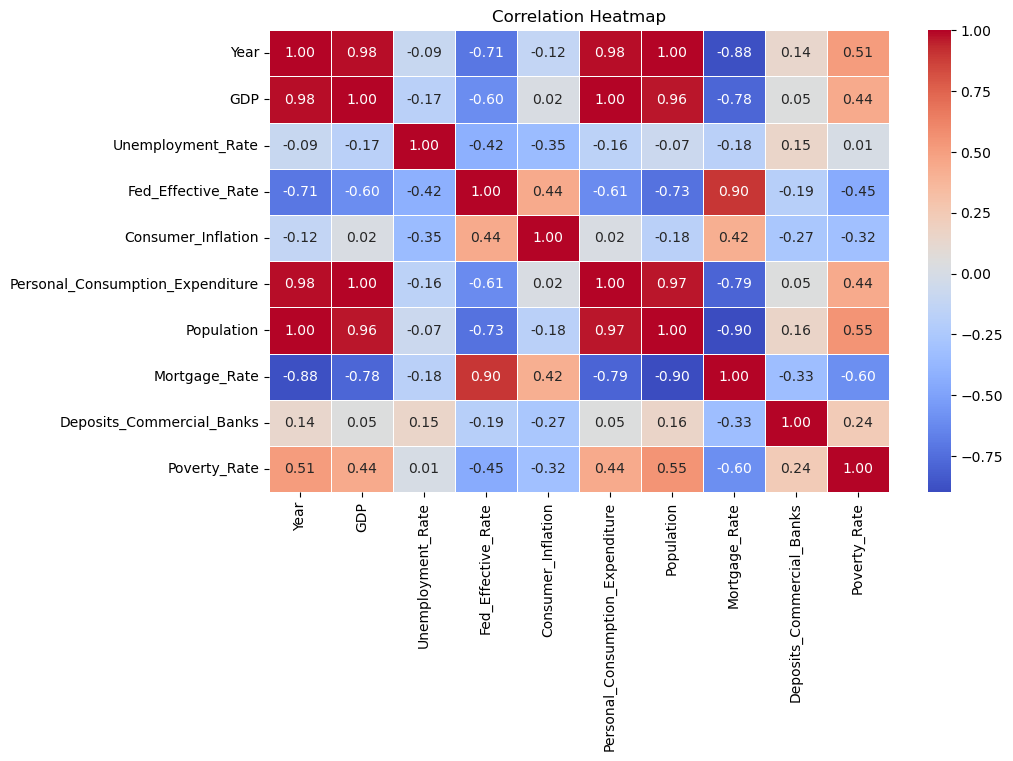

In [39]:
#Correlation Matrix only selecting numneric columns 
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the figure size
plt.figure(figsize=(10, 6))
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()